# Natural Language Processing Exercise (15 points)



The homework assignment is due by the end of the day on Thursday, December 5.

You are expected to solve the assignment problems independently and adhere to the university's policies for academic honesty and integrity. Copying solutions to the assignment problems from your classmates, the internet, or anywhere else is strictly prohibited.

**Note that your solutions are expected to follow the code examples provided in the lecture notes. If your solutions use functions or codes that are not covered in the lecture notes, that will result in zero marks assigned.**

Natural Language Processing exercise: 15 points

Total points for Assignment 6: 25 points

## Part 1. Load the Dataset (1 point)

In this exercise we will use the Reuters newswire dataset, which consists of 11,228 newswires from Reuters, labeled in 46 topics. Each newswire is a text sequence that is encoded as a list of word indexes, i.e., each word is a token represented by an integer number. Reuters newswire dataset is available in the Keras built-in datasets.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Print the version of tf
print("TensorFlow version:{}".format(tf.__version__))

TensorFlow version:2.14.0


We can load the `word_index` for the Reuters dataset, which is a dictionary consisting of words as keys and the corresponding integer indices as values. As we can see below, there are 30,979 words in the vocabulary for this dataset.

In [ ]:
word_index = keras.datasets.reuters.get_word_index()

550378/550378 [==============================] - 1s 1us/step


In [ ]:
len(word_index)

30979

In [ ]:
# Let's print 10 words and indices from the vocabulary
list(word_index.items())[:10]

[('mdbl', 10996),
 ('fawc', 16260),
 ('degussa', 12089),
 ('woods', 8803),
 ('hanging', 13796),
 ('localized', 20672),
 ('sation', 20673),
 ('chanthaburi', 20675),
 ('refunding', 10997),
 ('hermann', 8804)]

Let's load the dataset by using the first 30,000 words.

In [ ]:
max_features = 30000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=max_features,  test_split=0.2)

2110848/2110848 [==============================] - 1s 1us/step


Print the length of `train_data`, `train_labels`, `test_data`, and `test_labels`.

In [ ]:
# Your Code Here

Note again that each sequence in the dataset is a list of integer values representing words.

Print the first and second sequences in the train dataset.

In [ ]:
# Your Code Here

In [ ]:
# Your Code Here

Based on the `word_index`, we can find the sentences that correspond to each sequence of integers, as in the next cell.

In [ ]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

print([reverse_word_index.get(i-3) for i in train_data[0]])

[None, 'mcgrath', 'rentcorp', 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3']


The labels are the categories of the newswires. All 46 categories are shown below.

```
Reuters dataset labels:
{'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31,
'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27,
'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20,
 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38,
  'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4,
   'pet-chem': 39, 'grain': 1, 'retail': 29}
```

Printed below is the label for the first sentence, which corresponds to the `earn` category.

In [ ]:
train_labels[0]

3

Use Matplotlib to plot the histogram of the categories of newswires in `train_labels`.

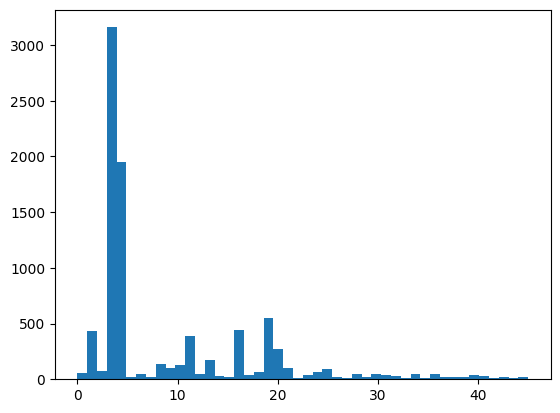

In [ ]:
# Your Code Here

## Part 2. Pad the Sequences (1 point)

Create a new NumPy array called `len_sequences` which has the same length as the `train_data` array. Write a for-loop and assign the length of each sequence (number of tokens in each sequence) to the elements in `len_sequences`. I.e., the elements in the `len_sequences` should be [87, 56, 139, 224, ....] where each element represents the number of tokens in each sequence in the training dataset.

Afterward, use the `len_sequences` array to print the average length of train sequences, the length of the longest train sequence, and the length of the shortest train sequence.

In [ ]:
# Your Code Here

In [ ]:
np.max(len_sequences)

2376.0

Create a new integer variable `pad_length` which is approximately equal to 2 x the average length of train sequences. E.g., if the average is 48.1, set maxlen to 100, or something in that range.

Apply padding to the train and test sequences, so that they have length equal to `pad_length`.

In [ ]:
# Your Code Here

Display the first 2 padded sequences in the train dataset.

In [ ]:
# Your Code Here

## Part 3. Create and Train a Model with Dense Layers (8 points)

Define a Keras model named `model_1` similar to the model in Lecture 19, which has an Embedding, Flatten, Dense, Dropout, and a final Dense layer. Use 64-dimensional vectors as outputs of the Embedding Layer, and 1,024 neurons in the first Dense layer. Make sure that the last layer has the same number of neurons and the class label categories in the dataset, and recall that with multiclass datasets the activation of the last layer should be `softmax`.

In [ ]:
# Your Code Here

Display the summary of the model, and report the number of trainable parameters.

In [ ]:
# Your Code Here

Compile the model with Adam optimizer using the default settings. If needed, review Lecture 15 to ensure that you apply the correct loss function.

Afterward, train the model for 5 epochs, and ensure that there are no errors in fitting the model. Use a batch size of 128, and use 20% of the training data for validation. The training should take 1-2 minutes on GPU.

Plot the learning curves.

Evaluate the model on the test dataset. The expected accuracy should be between 65% and 70%.

In [ ]:
# Your Code Here

### Apply Early Stopping

Create a model named `model_2` that is similar to `model_1`, but it uses Early Stopping callback. See Lectures 16 and 17 for examples with Early Stopping callback.

Train the model, plot the learning curves, and report the accuracy on the test dataset.

The training time should be 1-2 minutes.

In [ ]:
# Your Code Here

### Global Average Pooling Layer

Create `model_3` that replaces the `Flatten` layer in `model_2` with `GlobalAveragePooling1D()` layer. Fit the model using the same setting for `model_2`, plot the learning curves, and report the accuracy on the test dataset.

In [ ]:
# Your Code Here

### Different Learning Rates

Train `model_4`, `model_5`, and `model_6` using Adam optimizer with learning rates of 0.01, 0.001, and 0.0001, and discuss the impact on the performance.

In [ ]:
# Your Code Here

### Reduce Learning Rate on Plateau

Create `model_7` by appplying ReduceLROnPlateau callback and report the performance. If needed, check Lecture 17.

In [ ]:
# Your Code Here

### Learning Rate Scheduler

Create `model_8` by appplying a Step Decay Learning Rate Scheduler, to reduce the learning rate by half every 5 epochs.

Feel free to perform additional hyperparameter tuning if you wish, but it is not required.

In [ ]:
# Your Code Here

## Part 4. Create and Train a Model with Recurrent Layers (2 points)

Next, create `model_9` using LSTM layers similar to the model in Lecture 19. Train the model for 5 epochs without using callbacks, and report the performance. Expect longer training time with RNN models.

In [ ]:
# Your Code Here

### Improved Model

Use the strategy that was the most successful for the above models with Dense layers (e.g., LR scheduler, or ReduceLROnPlateau), and train an LSTM model named `model_10` using that strategy.

Feel free to perform additional hyperparameter tuning if you wish, but it is not required.

In [ ]:
# Your Code Here

## Part 5. Create and Train a Transformer Model (3 points)

Create `model_11` that implements a Transformer Network. Follow the instructions in Lecture 20. Train the Transformer model from scratch, i.e., it is not required to use a pretrained model. Select the hyperparameters as you wish, but aim to obtain over 70% accuracy.

Feel free to perform additional hyperparameter tuning if you wish, but it is not required.

In [ ]:
# Your Code Here